In [ ]:
#توی این حالت از گانولوشن دیگه نیازی به لایه دنس نداریم و باید لایه کانولوشن را اضافه کنیم

In [ ]:

import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras import backend as K
from keras import Sequential , models , layers
from keras.layers import Conv2D , MaxPooling2D , UpSampling2D , Flatten , Dense
from keras.optimizers import Adam

In [ ]:
# in AE we dont need labels
(xtrain , _),(xtest , _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(xtrain.shape)

(60000, 28, 28)


In [ ]:
#channel first and channel last
if K.image_data_format() == 'channels_first':
  xtrain = xtrain.reshape(xtrain.shape[0] , 1 , xtrain.shape[1] , xtrain.shape[2])
  xtest = xtest.reshape(xtest.shape[0] , 1 , xtest.shape[1] , xtest.shape[2])
  input_shape = (1 , xtrain.shape[1] , xtrain.shape[2])
else:
  xtrain = xtrain.reshape(xtrain.shape[0] ,  xtrain.shape[1] , xtrain.shape[2] , 1)
  xtest = xtest.reshape(xtest.shape[0] ,  xtest.shape[1] , xtest.shape[2] , 1)
  input_shape = (xtrain.shape[1] , xtrain.shape[2] , 1)

In [ ]:
print(xtrain.shape)

(60000, 28, 28, 1)


In [ ]:
# Add noise to the training data
noise_factor = 0.5
x_train_noisy = xtrain +( noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtrain.shape))
x_test_noisy = xtest + (noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtest.shape))

# Clip the values to the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(xtrain.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


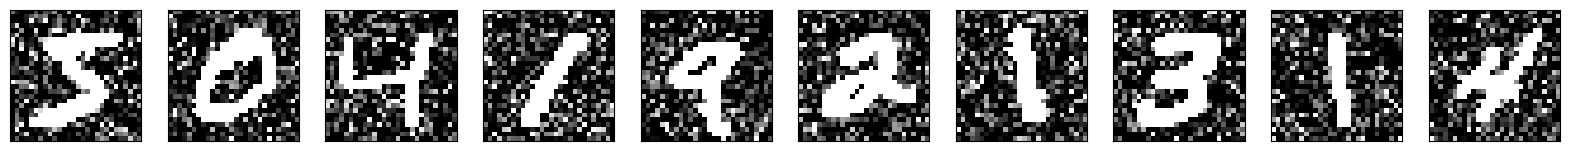

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display reconstruction
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.gray()
plt.show()

In [ ]:
# Define the encoder model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Define the decoder model
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.summary() #28*28*1

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse' ,metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
output_fit= model.fit(x_train_noisy, xtrain,
          epochs=5,
          batch_size=128,
          shuffle=True
          )


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 122s 260ms/step - accuracy: 0.7789 - loss: 866.9241
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 244ms/step - accuracy: 0.7811 - loss: 840.1367
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 249ms/step - accuracy: 0.7823 - loss: 817.7122
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 254ms/step - accuracy: 0.7835 - loss: 796.7194
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 252ms/step - accuracy: 0.7845 - loss: 780.2255


In [ ]:
print(output_fit.history.keys())

dict_keys(['accuracy', 'loss'])


In [ ]:

print(output_fit.history['loss'])

[861.7367553710938, 835.1598510742188, 811.9979858398438, 792.4317626953125, 774.9196166992188]


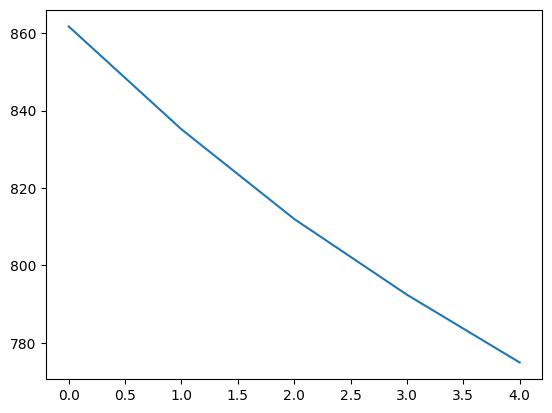

In [ ]:
plt.plot(output_fit.history['loss'])
plt.show()


In [ ]:
# Evaluate the model
output_predict = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [ ]:
print(output_predict.shape)

(10000, 28, 28, 1)


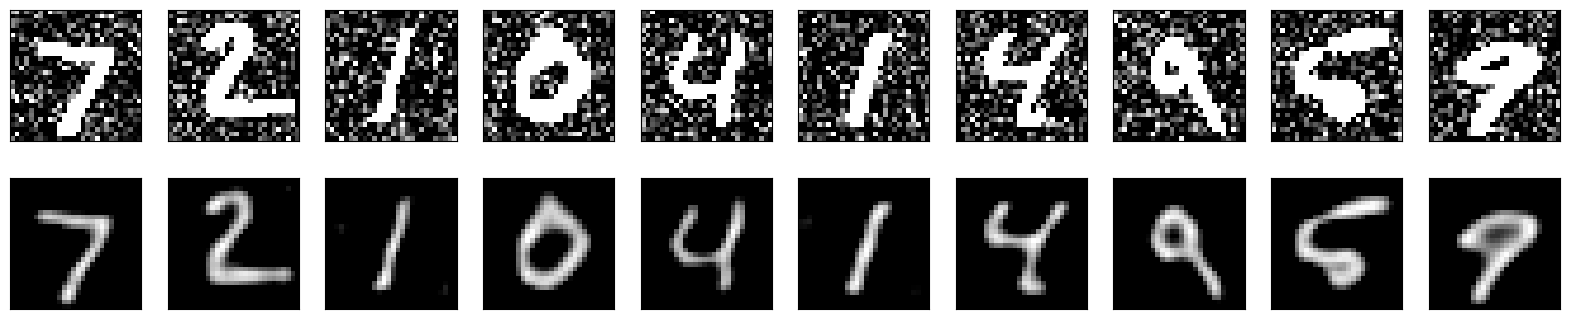

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i +1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(output_predict[i].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.gray()
plt.show()